In [1]:
#importing CSV File and Reading it
import pandas as pd
import numpy as np
import csv
import scipy
from scipy.stats import pearsonr
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
FA0_dataset = pd.read_csv("FA0_dataset.csv")

In [3]:
#reading data from .csv file 
colnames = ['Alcohol, Non-Food', 'Alcoholic Beverages', 'Animal Products', 'Animal fats', 'Apples and products', 'Aquatic Animals, Others', 'Aquatic Plants', 'Aquatic Products, Other', 'Bananas', 'Barley and products', 'Beans', 'Beer', 'Beverages, Alcoholic', 'Beverages, Fermented', 'Bovine Meat', 'Butter, Ghee', 'Cassava and products', 'Cephalopods', 'Cereals - Excluding Beer', 'Cereals, Other', 'Citrus, Other', 'Cloves', 'Cocoa Beans and products', 'Coconut Oil', 'Coconuts - Incl Copra', 'Coffee and products', 'Cottonseed', 'Cottonseed Oil', 'Cream', 'Crustaceans', 'Dates', 'Demersal Fish', 'Eggs', 'Fats, Animals, Raw', 'Fish, Body Oil', 'Fish, Liver Oil', 'Fish, Seafood', 'Freshwater Fish', 'Fruits - Excluding Wine', 'Fruits, Other', 'Grand Total', 'Grapefruit and products', 'Grapes and products (excl wine)', 'Groundnut Oil', 'Groundnuts (Shelled Eq)', 'Honey', 'Infant food', 'Lemons, Limes and products', 'Maize Germ Oil', 'Maize and products', 'Marine Fish, Other', 'Meat', 'Meat, Aquatic Mammals', 'Meat, Other', 'Milk - Excluding Butter', 'Millet and products', 'Miscellaneous', 'Molluscs, Other', 'Mutton & Goat Meat', 'Nuts and products', 'Oats', 'Offals', 'Offals, Edible', 'Oilcrops', 'Oilcrops Oil, Other', 'Oilcrops, Other', 'Olive Oil', 'Olives (including preserved)', 'Onions', 'Oranges, Mandarines', 'Palm Oil', 'Palm kernels', 'Palmkernel Oil', 'Peas', 'Pelagic Fish', 'Pepper', 'Pigmeat', 'Pimento', 'Pineapples and products', 'Plantains', 'Potatoes and products', 'Poultry Meat', 'Pulses', 'Pulses, Other and products', 'Rape and Mustard Oil', 'Rape and Mustardseed', 'Rice (Milled Equivalent)', 'Ricebran Oil', 'Roots, Other', 'Rye and products', 'Sesame seed', 'Sesameseed Oil', 'Sorghum and products', 'Soyabean Oil', 'Soyabeans', 'Spices', 'Spices, Other', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar (Raw Equivalent)', 'Sugar Crops', 'Sugar beet', 'Sugar cane', 'Sugar non-centrifugal', 'Sunflower seed', 'Sunflowerseed Oil', 'Sweet potatoes', 'Sweeteners, Other', 'Tea (including mate)', 'Tomatoes and products', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Vegetables, Other', 'Vegetal Products', 'Wheat and products', 'Wine', 'Yams']
#inv_colnames = ['taxamount', 'landtaxvaluedollarcnt', 'structuretaxvaluedollarcnt','taxvaluedollarcnt','yearbuilt','yardbuildingsqft26','yardbuildingsqft17','unitcnt','typeconstructiontypeid','roomcnt','regionidneighborhood','regionidzip','regionidcity','regionidcounty','censustractandblock','rawcensustractandblock','propertylandusetypeid','poolsizesum','numberofstories','lotsizesquarefeet','longitude','latitude','heatingorsystemtypeid','garagetotalsqft','garagecarcnt','fullbathcnt','fireplacecnt','finishedsquarefeet50','finishedsquarefeet15','finishedsquarefeet13','finishedsquarefeet12','finishedsquarefeet6','calculatedfinishedsquarefeet','finishedfloor1squarefeet','threequarterbathnbr','calculatedbathnbr','buildingqualitytypeid','bedroomcnt','bathroomcnt','basementsqft','airconditioningtypeid']

In [4]:
len(colnames)

119

In [10]:
corrs = []
cvalue = 0
ccolname = []
ncols = 119

#get the first column from the dataframe
for i in range(0, ncols):
    data1 = np.array(FA0_dataset[colnames[i]])
    cvalue = cvalue + 1
    ccolname.append(colnames[i])
    
    #getting indexes where value is NaN for column1
    data1_ind = np.where(np.isnan(data1))
    
    #get second column from dataset
    for j in range(0, ncols):
        data2 = np.array(FA0_dataset[colnames[j]])
        
        #deleting indexes if either has NaN values 
        new_data1 = np.delete(data1, data1_ind)
        new_data2 = np.delete(data2, data1_ind)
        
        #getting indexes where value is NaN for column2
        new_data2_ind = np.where(np.isnan(new_data2))
        data2_withoutNan = np.delete(new_data2, new_data2_ind)
        data1_withoutNan = np.delete(new_data1, new_data2_ind)
        
        #calculating pearson correlation
        corr, n_corr = scipy.stats.pearsonr(data1_withoutNan,data1_withoutNan)
        
        #appending the correlation into array
        corrs.append(corr)

/Users/abhinavjain/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:3016: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/Users/abhinavjain/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/abhinavjain/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:3017: RuntimeWarning: Mean of empty slice.
  my = y.mean()
/Users/abhinavjain/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


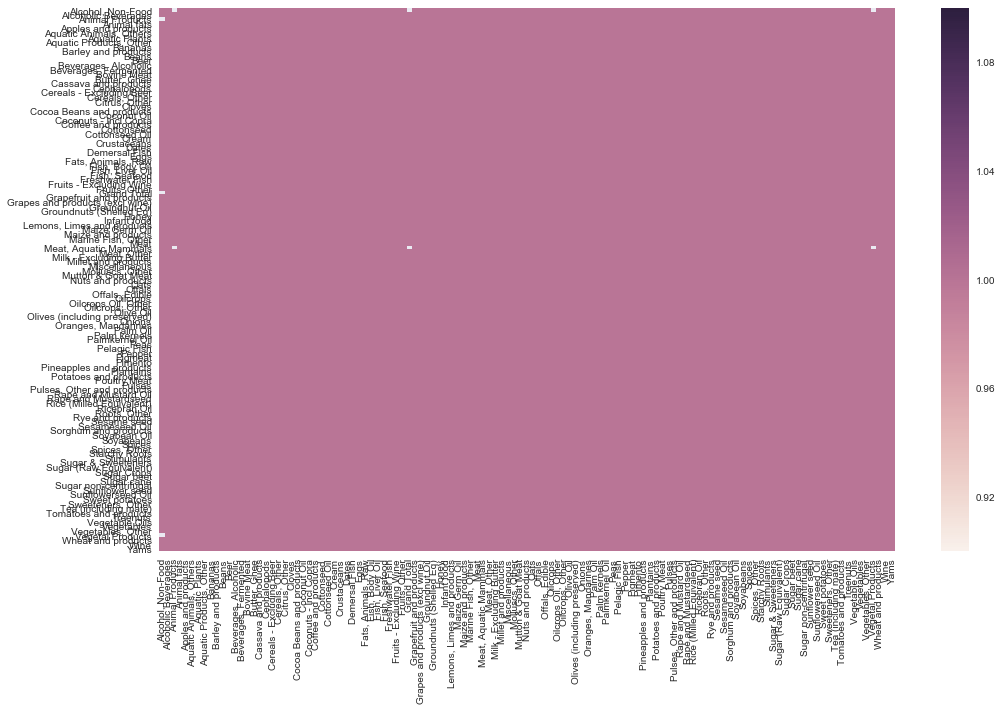

In [11]:
#creating heatmap using seaborn library
a = np.array(corrs).reshape(cvalue,cvalue)
ax = sns.heatmap(a)
ax.set_yticklabels(reversed(colnames))
ax.set_xticklabels(colnames)
fig = plt.gcf()
fig.set_size_inches(16.5, 10)
plt.show()